In [ ]:
import requests
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
from matplotlib import pyplot as plt
import warnings
warnings.filterwarnings('ignore')

Importujemy nasze dane przy użyciu dostępnego API:

In [ ]:
voices_get = requests.get("https://api.apispreadsheets.com/api/dataset/gender-voice/")
voices_dict = voices_get.json()

Tworzymy ramkę danych i sprawdzamy dla niej heada, describe'a i info:

In [ ]:
voices_df = pd.json_normalize(voices_dict, 'data')
voices_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3168 entries, 0 to 3167
Data columns (total 21 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   meanfreq  3168 non-null   float64
 1   sd        3168 non-null   float64
 2   median    3168 non-null   float64
 3   Q25       3168 non-null   float64
 4   Q75       3168 non-null   float64
 5   IQR       3168 non-null   float64
 6   skew      3168 non-null   float64
 7   kurt      3168 non-null   float64
 8   sp.ent    3168 non-null   float64
 9   sfm       3168 non-null   float64
 10  mode      3168 non-null   float64
 11  centroid  3168 non-null   float64
 12  meanfun   3168 non-null   float64
 13  minfun    3168 non-null   float64
 14  maxfun    3168 non-null   float64
 15  meandom   3168 non-null   float64
 16  mindom    3168 non-null   float64
 17  maxdom    3168 non-null   float64
 18  dfrange   3168 non-null   float64
 19  modindx   3168 non-null   float64
 20  label     3168 non-null   obje

Na całe szczęście wszystkie wartości są nie-nullowe :)
Postanowiliśmy krótko opisać każdą kolumne.

**meanfreq** - średnia częstotliwość (w kHz)

**sd** -	odchylenie standadrowe częstotliwości

**median** -	mediana częstotliwości (w kHz)

**Q25** -	pierwszy kwantyl częstotliwości (w kHz)

**Q75** -	trzeci kwantyl częstotliwości (w kHz)

**IQR** -	rozstęp międzykwartylowy (w kHz)

**skew** -	wspołczynnik asymetrii (skośność) 

**kurt** -	kurtoza

**sp.ent** -	entropia widmowa

**sfm** -	widmowa płaskość

**mode** -	moda

**centroid** -	centroid

**meanfun** - średnia podstawowa częstotliwość zmierzona w całym sygnale akustycznym

**minfun** -	minimalna podstawowa częstotliwość zmierzona w całym sygnale akustycznym

**maxfun** -	maksymalna podstawowa częstotliwość zmierzona w całym sygnale akustycznym

**label** - zmienna celu określająca płeć	

**meandom** - średnia dominującej częstotliwości zmierzonej w całym sygnale akustycznym

**mindom** - minimum dominującej częstotliwości zmierzonej w całym sygnale akustycznym

**maxdom** - maksimum dominującej częstotliwości zmierzonej w całym sygnale akustycznym

**dfrange** - zasięg dominującej częstotliwości zmierzonej w całym sygnale akustycznym

**modindx** - indeks modulacji.

In [ ]:
voices_df.head()

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,mode,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,label
0,0.059781,0.064241,0.032027,0.015071,0.090193,0.075122,12.863462,274.402906,0.893369,0.491918,0.000000,0.059781,0.084279,0.015702,0.275862,0.007812,0.007812,0.007812,0.000000,0.000000,male
1,0.066009,0.067310,0.040229,0.019414,0.092666,0.073252,22.423285,634.613855,0.892193,0.513724,0.000000,0.066009,0.107937,0.015826,0.250000,0.009014,0.007812,0.054688,0.046875,0.052632,male
2,0.077316,0.083829,0.036718,0.008701,0.131908,0.123207,30.757155,1024.927705,0.846389,0.478905,0.000000,0.077316,0.098706,0.015656,0.271186,0.007990,0.007812,0.015625,0.007812,0.046512,male
3,0.151228,0.072111,0.158011,0.096582,0.207955,0.111374,1.232831,4.177296,0.963322,0.727232,0.083878,0.151228,0.088965,0.017798,0.250000,0.201497,0.007812,0.562500,0.554688,0.247119,male
4,0.135120,0.079146,0.124656,0.078720,0.206045,0.127325,1.101174,4.333713,0.971955,0.783568,0.104261,0.135120,0.106398,0.016931,0.266667,0.712812,0.007812,5.484375,5.476562,0.208274,male


In [ ]:
voices_df.describe()

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,mode,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx
count,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000
mean,0.180907,0.057126,0.185621,0.140456,0.224765,0.084309,3.140168,36.568461,0.895127,0.408216,0.165282,0.180907,0.142807,0.036802,0.258842,0.829211,0.052647,5.047277,4.994630,0.173752
std,0.029918,0.016652,0.036360,0.048680,0.023639,0.042783,4.240529,134.928661,0.044980,0.177521,0.077203,0.029918,0.032304,0.019220,0.030077,0.525205,0.063299,3.521157,3.520039,0.119454
min,0.039363,0.018363,0.010975,0.000229,0.042946,0.014558,0.141735,2.068455,0.738651,0.036876,0.000000,0.039363,0.055565,0.009775,0.103093,0.007812,0.004883,0.007812,0.000000,0.000000
25%,0.163662,0.041954,0.169593,0.111087,0.208747,0.042560,1.649569,5.669547,0.861811,0.258041,0.118016,0.163662,0.116998,0.018223,0.253968,0.419828,0.007812,2.070312,2.044922,0.099766
50%,0.184838,0.059155,0.190032,0.140286,0.225684,0.094280,2.197101,8.318463,0.901767,0.396335,0.186599,0.184838,0.140519,0.046110,0.271186,0.765795,0.023438,4.992188,4.945312,0.139357
75%,0.199146,0.067020,0.210618,0.175939,0.243660,0.114175,2.931694,13.648905,0.928713,0.533676,0.221104,0.199146,0.169581,0.047904,0.277457,1.177166,0.070312,7.007812,6.992188,0.209183
max,0.251124,0.115273,0.261224,0.247347,0.273469,0.252225,34.725453,1309.612887,0.981997,0.842936,0.280000,0.251124,0.237636,0.204082,0.279114,2.957682,0.458984,21.867188,21.843750,0.932374


Sprawdźmy jaki rozkład rekordów pod względem płci:

In [ ]:
print(voices_df['label'].value_counts())

female    1584
male      1584
Name: label, dtype: int64


Idealnie równo. Sprawdźmy teraz jak prezentują się rozkłady pozostałych zmiennych:

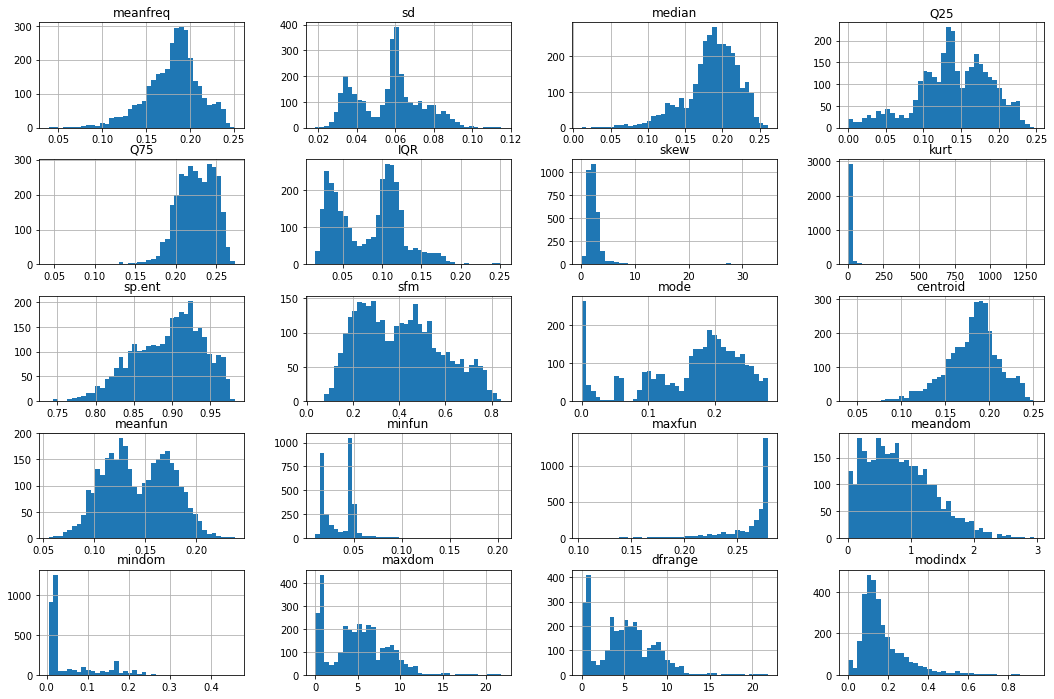

In [ ]:
voices_df.hist(bins = 40, figsize=(18, 12))
plt.show()

Zmienne *skew* i *kurt* mają bardzo długie ogony. Zastosujmy zatem dla nich skalę logarytmiczną, aby otrzymać rozkład bliższy normalnemu. 

Podobnie chcielibyśmy stransformować zmienne *minfun*, *maxfun* i *mindom*, jednak wartości tych zmiennych należą do przedziału [0,1], a co za tym idzie logarytm nam tu nie pomoże.

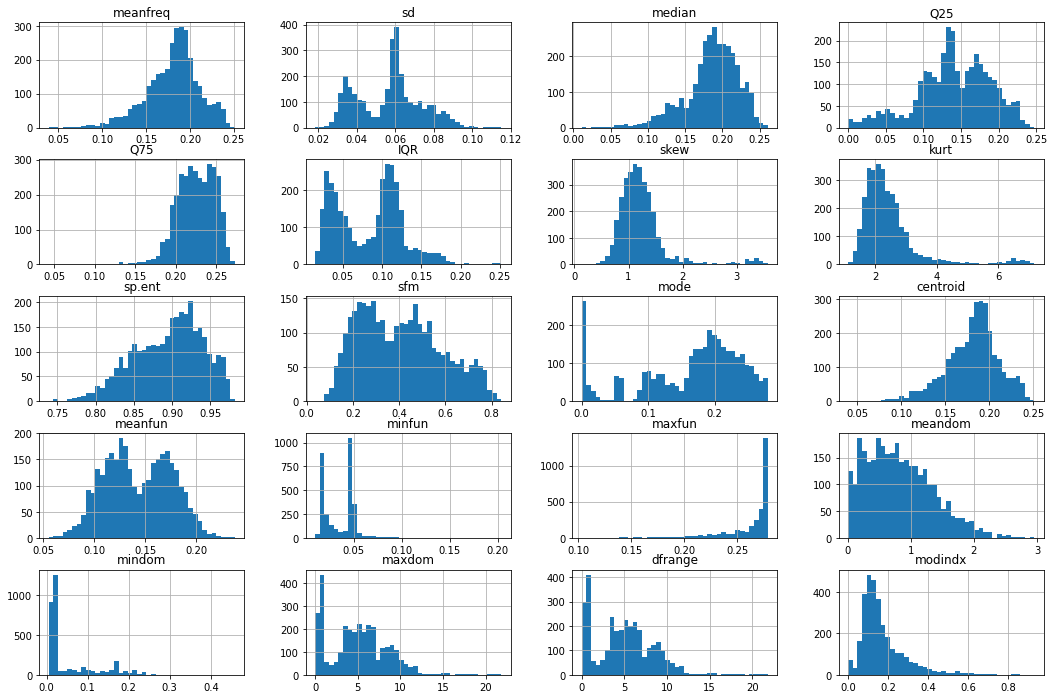

In [ ]:
voices_log = voices_df.copy(deep=True)
voices_log['skew'] = np.log1p(voices_df['skew'])
voices_log['kurt'] = np.log1p(voices_df['kurt'])
voices_log.hist(bins = 40, figsize=(18, 12))
plt.show()

Zauważmy, że rozkłady kilku kategorii (szczególnie *sd*, *IQR* i *meanfun*) mają dwa "grzbiety". Nasuwa się przypuszczenie, że odpowiadają one dwóm płciom. Sprawdźmy zatem jak wyglądają nasze histogramy z wyszczególnieniem płci.

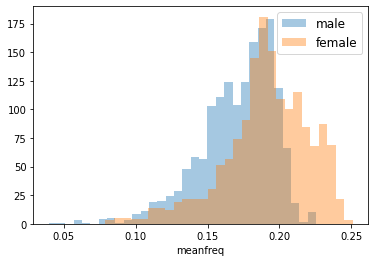

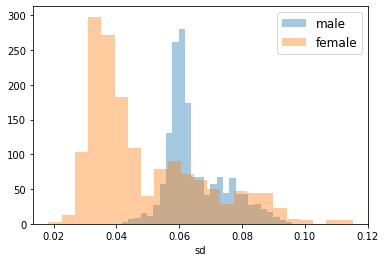

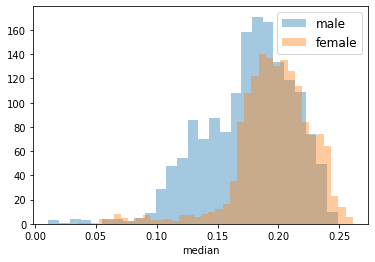

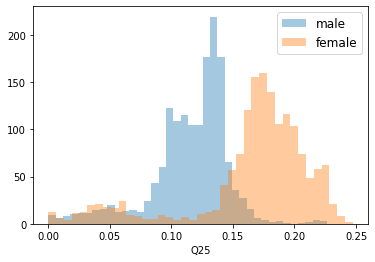

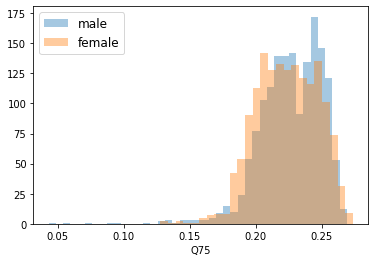

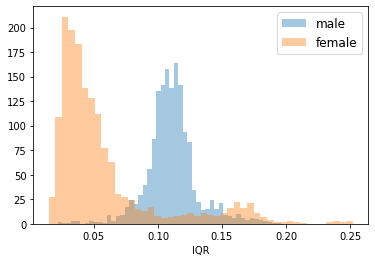

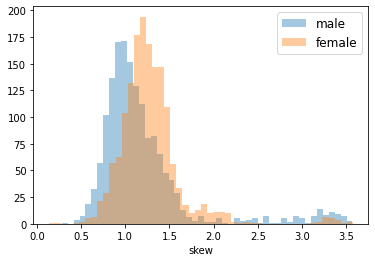

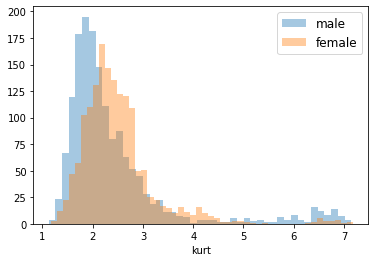

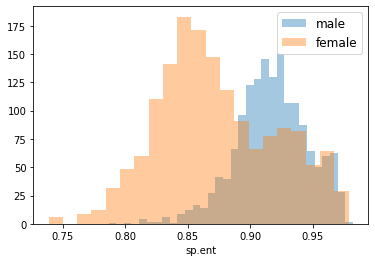

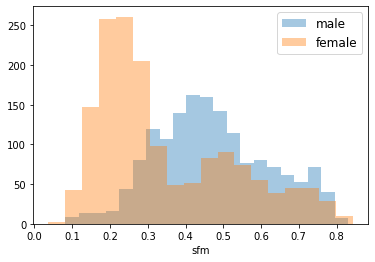

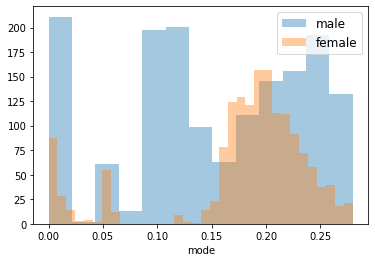

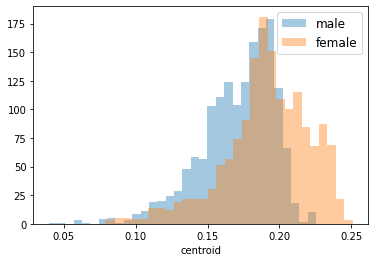

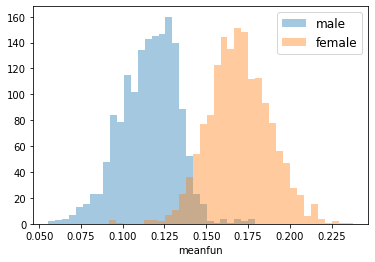

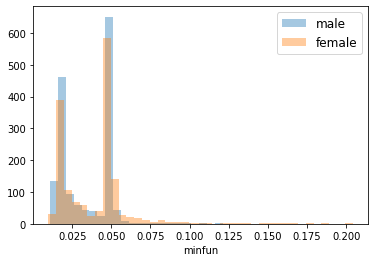

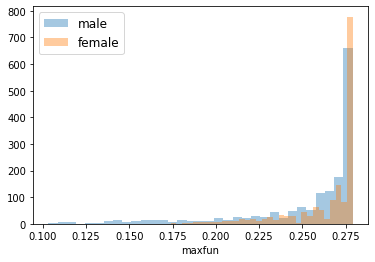

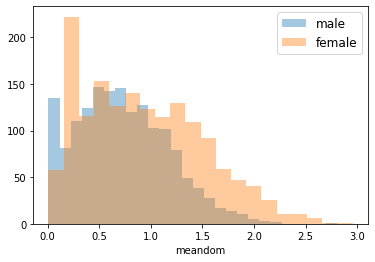

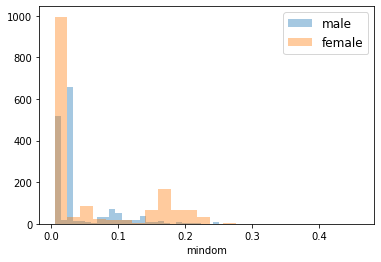

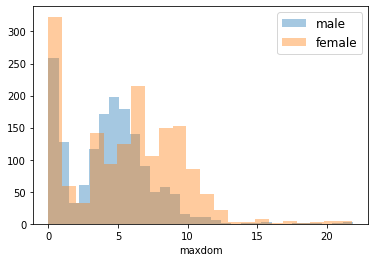

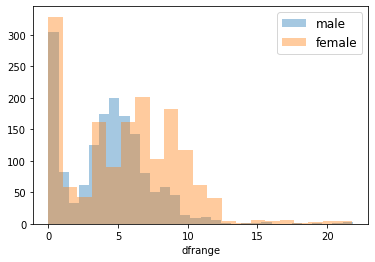

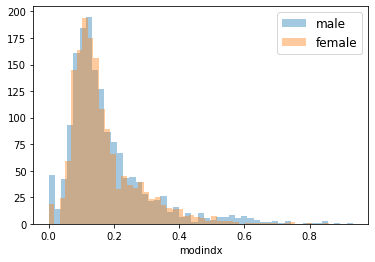

In [ ]:
for column in voices_log.columns[:-1]:
  sns.distplot(voices_log[voices_log.label=="male"][column],kde=False,label='male')
  sns.distplot(voices_log[voices_log.label=="female"][column],kde=False,label='female')
  plt.legend(prop={'size': 12})
  plt.show()

Nasze przypuszczenia okazały się słuszne. Dla niektórych kategorii historgram jest złożeniem dwóch rozkładów normalnych odpowiadających poszczególnym płciom.

Stwórzmy teraz macierz korelacji, aby sprawdzić, które zmienne są ze sobą mocno powiązane. Ponieważ mamy aż 20 kategorii (wyłączając zmienną celu), ograniczmy się tylko do tych korelacji, których wartość bezwględna jest większa niż 0.75.

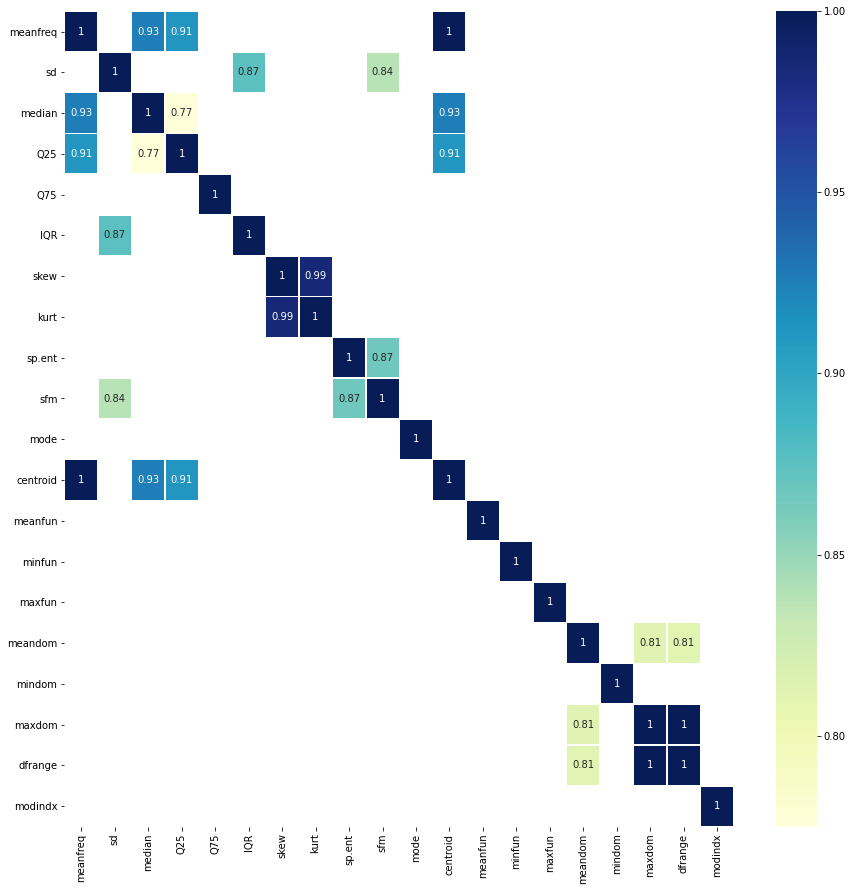

In [ ]:
macierz = voices_log.corr()

fig, ax = plt.subplots(figsize=(15,15))
sns.heatmap(macierz[abs(macierz>0.75)], annot=True,linewidths=.5,cmap="YlGnBu")

plt.show()

Jak widać zmienna *centroid* jest mocno skorelowana ze zmiennymi *median* i *meanfreq*. Potencjalnie może to sugerować, że zmienna ta jest bezużyteczna. Zobaczmy jak prezentują się pairploty dla tych kategorii:

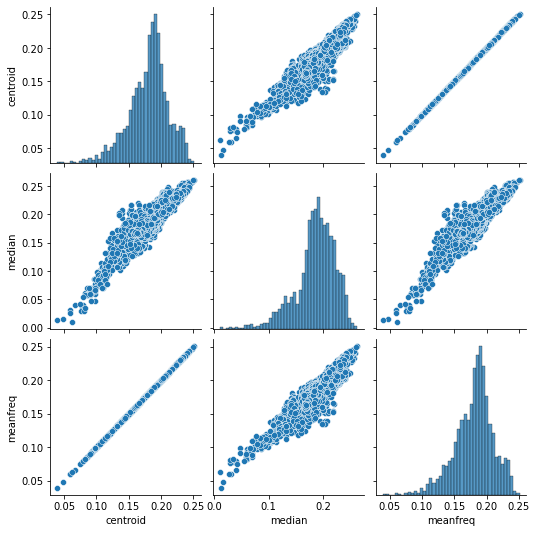

In [ ]:
sns.pairplot(voices_log[["centroid", "median", "meanfreq"]])

plt.show()

Dodatkowo widzimy, że skośność jest silnie skorelowana z kurtozą, co też sugeruje, że jedna z tych zmiennych może być nieprzydatna:

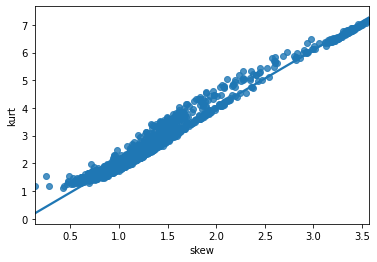

In [ ]:
sns.regplot(data = voices_log, x = 'skew', y = 'kurt')
plt.show()

Pamiętając, że zmienne *meanfun*, *IQR* i *sd* bardzo mocno polaryzują wartości odpowiadające głosom męskim i żeńskim, sprawdźmy podobne zależności dla tych kategorii.

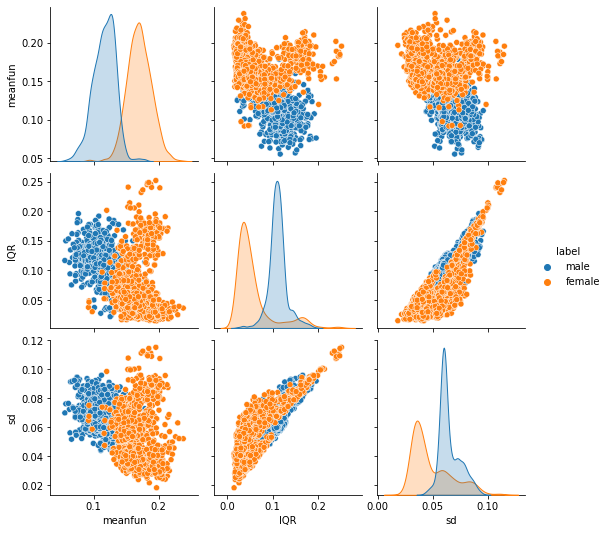

In [ ]:
sns.pairplot(voices_log[["meanfun", "IQR", "sd","label"]],hue='label')

plt.show()

Jak widzimy, rekordy żeńskie i męskie zostały mocno rozdzielone w przypadku zmiennych *meanfun* i *IQR* oraz *meanfun* i *sd*. W przypadku pary *IQR* i *sd* rekordy się pokrywają, co wynika z tego, że obie te zmienne są ze sobą mocno skorelowane.